In [18]:
import numpy as np
import pandas as pd
import sklearn
import pickle

from matplotlib import pyplot as pl
%matplotlib inline

import matplotlib
matplotlib.font_manager._rebuild()
 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [19]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 212)

In [20]:
train = pd.read_csv("train_x.csv")
trainY = pd.read_csv("train_y.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (114) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
train["応募数 合計"] = trainY["応募数 合計"]

In [22]:
train

,職場の様子,（紹介予定）入社後の雇用形態,勤務地 最寄駅3（駅名）,勤務地固定,休日休暇(月曜日),応募先 名称,（派遣先）配属先部署 男女比 男,勤務地 最寄駅3（沿線名）,（派遣先）勤務先写真コメント,勤務地 最寄駅3（分）,無期雇用派遣,勤務地 最寄駅2（駅名）,未使用.14,（派遣以外）応募後の流れ,（派遣先）概要 従業員数,電話応対なし,大手企業,（紹介予定）雇用形態備考,週払い,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,固定残業制 残業代 下限,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,未使用.11,短時間勤務OK(1日4h以内),駅から徒歩5分以内,フリー項目 内容,先輩からのメッセージ,対象者設定 年齢下限,未使用.10,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,動画コメント,Wordのスキルを活かす,未使用.8,経験必須,固定残業制 残業代に充当する労働時間数 下限,給与/交通費 給与支払区分,ブロックコード2,勤務地 最寄駅1（分）,未使用.4,CAD関連のスキルを活かす,未使用.7,お仕事No.,メモ,派遣スタッフ活躍中,ブロックコード3,固定残業制,WEB面接OK,大量募集,公開区分,17時以降出社OK,寮・社宅あり,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,ネットワーク関連のスキルを活かす,Wワーク・副業可能,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),固定残業制 残業代に充当する労働時間数 上限,プログラム関連のスキルを活かす,未使用.15,平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,30代活躍中,フラグオプション選択,未使用.12,エルダー（50〜）活躍中,（派遣）応募後の流れ,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,人材紹介,週2・3日OK,主婦(ママ)・主夫歓迎,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,ブロックコード1,フリー項目 タイトル,社員食堂あり,（紹介予定）入社時期,お仕事名,資格取得支援制度あり,未使用.1,ブランクOK,対象者設定 年齢上限,未使用.20,...,社会保険制度あり,募集形態,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),勤務地 最寄駅3（駅からの交通手段）,外資系企業,（派遣先）勤務先写真ファイル名,応募先 最寄駅（沿線名）,服装自由,仕事写真（下） 写真1 ファイル名,PowerPointのスキルを活かす,未使用.16,仕事写真（下） 写真3 ファイル名,オープニングスタッフ,応募先 所在地 ブロックコード,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,応募先 所在地 都道府県,動画タイトル,仕事内容,（派遣先）概要 事業内容,応募先 最寄駅（駅名）,残業月10時間未満,休日休暇(土曜日),（紹介予定）年収・給与例,外国人活躍中・留学生歓迎,履歴書不要,未使用.17,休日休暇(木曜日),未使用.9,研修制度あり,日払い,未使用,勤務地 最寄駅1（沿線名）,未使用.18,未使用.22,未使用.5,（派遣先）配属先部署 平均年齢,英語力を活かす,勤務地 周辺情報,仕事写真（下） 写真2 ファイル名,バイク・自転車通勤OK,仕事写真（下） 写真2 コメント,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,未使用.3,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),未使用.2,WEB関連のスキルを活かす,仕事の仕方,未使用.6,給与 経験者給与下限,勤務地 最寄駅1（駅からの交通手段）,応募資格,学生歓迎,紹介予定派遣,固定残業制 残業代 上限,未使用.19,（紹介予定）休日休暇,給与 経験者給与上限,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,未使用.21,待遇・福利厚生,シニア（60〜）歓迎,ベンチャー企業,少人数の職場,仕事写真（下） 写真3 コメント,新卒・第二新卒歓迎,休日休暇(金曜日),お仕事のポイント（仕事PR）,産休育休取得事例あり,扶養控除内,動画ファイル名,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,応募先 備考,オフィスが禁煙・分煙,応募先 所在地 市区町村,仕事写真（下） 写真1 コメント,勤務地 市区町村コード,（派遣先）職場の雰囲気,未使用.13,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,応募拠点,給与/交通費 備考,残業なし,これまでの採用者例,期間･時間 備考,（派遣先）概要 勤務先名（フリガナ）,応募数 合計
0,3,NaN,NaN,1,0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,12.0,NaN,0,22010,1,1,1,NaN,0,1,NaN,NaN,0,NaN,1,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,3.0,NaN,0,NaN,2203566799,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,1,1,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,NaN,0,NaN,0,1,0,0,0,東京都足立区,1,206東京,1,0,0,NaN,NaN,1,NaN,ほぼ１６時半終業☆大学＊申請受付ｅｔｃ！未経験スタートＯＫ☆,1,NaN,NaN,99,NaN,...,1,NaN,2020/1/6,0,1,NaN,0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,事務処理を行う部署,4.0,NaN,こだわりの条件でワガママに探せる＊,１月スタート！実働短め☆残業ほとんどなし×基本土日祝お休み！朝は少しゆっくりの９：３０出勤で...,NaN,NaN,0,1,NaN,NaN,1,NaN,0,NaN,1,NaN,NaN,東京メトロ千代田線,NaN,NaN,NaN,45.0,0,NaN,NaN,NaN,NaN,0,30000,13,NaN,0,0,0,NaN,0,NaN,NaN,2,NaN,NaN,1.0,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬＯＯＫ関数）<BR><BR>▼...,NaN,0,NaN,NaN,NaN,NaN,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,NaN,NaN,NaN,NaN,NaN,NaN,1,0,◆駅からスグ！飲食店・コンビニが近く便利！職場環境ＧＯＯＤ◎！当社含む派遣スタッフ多数活躍中...,1,0,022_190725.mp4,1550,1,1,NaN,1,NaN,NaN,121,当社スタッフ活躍中です！<BR>,NaN,NaN,北千住,NaN,NaN,【月収例】19万5300円＋残業代（21日勤務の場合）,1,NaN,◆開始日はご相談可能です！詳しくはお問い合わせください！,NaN,1.945910
1,3,1.0,NaN,1,0,NaN,2.0,NaN,NaN,NaN,NaN,淡路町,NaN,NaN,NaN,NaN,1,正社員,NaN,0,0,33.0,NaN,0,20020,1,1,1,NaN,0,1,NaN,NaN,0,NaN,0,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,1.0,NaN,0,NaN,2203546900,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,東京メトロ丸ノ内線,0,NaN,NaN,NaN,0,NaN,1.0,※土・日・祝がお休みです。,1,3,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,NaN,0,NaN,0,1,0,1,0,東京都千代田区,1,206東京,1,0,0,NaN,NaN,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,1,NaN,NaN,99,NaN,...,1,NaN,2019/11/26,0,1,NaN,0,1018-2.jpg,NaN,1,NaN,0,NaN,NaN,NaN,NaN,経理部,8.0,NaN,こだわりの条件でワガママに探せる＊,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ラン

<AxesSubplot:ylabel='Frequency'>

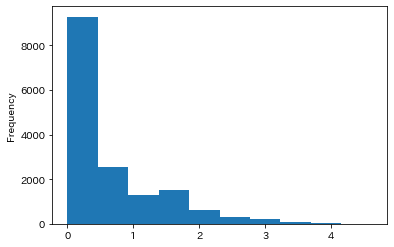

In [23]:
train["応募数 合計"].plot.hist()

In [24]:
train.isnull().sum()

職場の様子                         0
（紹介予定）入社後の雇用形態            13111
勤務地　最寄駅3（駅名）              15853
勤務地固定                         0
休日休暇(月曜日)                     0
応募先　名称                    15853
（派遣先）配属先部署　男女比　男           2052
勤務地　最寄駅3（沿線名）             15853
（派遣先）勤務先写真コメント            15853
勤務地　最寄駅3（分）               15853
無期雇用派遣                    15853
勤務地　最寄駅2（駅名）               8367
未使用.14                    15853
（派遣以外）応募後の流れ              15853
（派遣先）概要　従業員数              15853
電話応対なし                    15853
大手企業                          0
（紹介予定）雇用形態備考              13111
週払い                       15853
週1日からOK                       0
交通費別途支給                       0
（派遣先）配属先部署　人数              2039
固定残業制 残業代 下限              15853
残業月20時間以上                     0
職種コード                         0
1日7時間以下勤務OK                   0
ミドル（40〜）活躍中                   0
ルーティンワークがメイン                  0
未使用.11                    15853
短時間勤務OK(1日4h以内)               0
駅から徒歩5分以内                     0
フリー項目　内容

In [25]:
train["期間・時間　勤務開始月"] = train["期間・時間　勤務開始日"].apply(lambda x : x.split("/")[1])

In [26]:
train["期間・時間　勤務開始月"] = train["期間・時間　勤務開始月"].astype(np.int)

In [27]:
train

,職場の様子,（紹介予定）入社後の雇用形態,勤務地 最寄駅3（駅名）,勤務地固定,休日休暇(月曜日),応募先 名称,（派遣先）配属先部署 男女比 男,勤務地 最寄駅3（沿線名）,（派遣先）勤務先写真コメント,勤務地 最寄駅3（分）,無期雇用派遣,勤務地 最寄駅2（駅名）,未使用.14,（派遣以外）応募後の流れ,（派遣先）概要 従業員数,電話応対なし,大手企業,（紹介予定）雇用形態備考,週払い,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,固定残業制 残業代 下限,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,未使用.11,短時間勤務OK(1日4h以内),駅から徒歩5分以内,フリー項目 内容,先輩からのメッセージ,対象者設定 年齢下限,未使用.10,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,動画コメント,Wordのスキルを活かす,未使用.8,経験必須,固定残業制 残業代に充当する労働時間数 下限,給与/交通費 給与支払区分,ブロックコード2,勤務地 最寄駅1（分）,未使用.4,CAD関連のスキルを活かす,未使用.7,お仕事No.,メモ,派遣スタッフ活躍中,ブロックコード3,固定残業制,WEB面接OK,大量募集,公開区分,17時以降出社OK,寮・社宅あり,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,ネットワーク関連のスキルを活かす,Wワーク・副業可能,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),固定残業制 残業代に充当する労働時間数 上限,プログラム関連のスキルを活かす,未使用.15,平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,30代活躍中,フラグオプション選択,未使用.12,エルダー（50〜）活躍中,（派遣）応募後の流れ,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,人材紹介,週2・3日OK,主婦(ママ)・主夫歓迎,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,ブロックコード1,フリー項目 タイトル,社員食堂あり,（紹介予定）入社時期,お仕事名,資格取得支援制度あり,未使用.1,ブランクOK,対象者設定 年齢上限,未使用.20,...,募集形態,期間・時間 勤務開始日,英語以外の語学力を活かす,休日休暇(祝日),勤務地 最寄駅3（駅からの交通手段）,外資系企業,（派遣先）勤務先写真ファイル名,応募先 最寄駅（沿線名）,服装自由,仕事写真（下） 写真1 ファイル名,PowerPointのスキルを活かす,未使用.16,仕事写真（下） 写真3 ファイル名,オープニングスタッフ,応募先 所在地 ブロックコード,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,応募先 所在地 都道府県,動画タイトル,仕事内容,（派遣先）概要 事業内容,応募先 最寄駅（駅名）,残業月10時間未満,休日休暇(土曜日),（紹介予定）年収・給与例,外国人活躍中・留学生歓迎,履歴書不要,未使用.17,休日休暇(木曜日),未使用.9,研修制度あり,日払い,未使用,勤務地 最寄駅1（沿線名）,未使用.18,未使用.22,未使用.5,（派遣先）配属先部署 平均年齢,英語力を活かす,勤務地 周辺情報,仕事写真（下） 写真2 ファイル名,バイク・自転車通勤OK,仕事写真（下） 写真2 コメント,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,未使用.3,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),未使用.2,WEB関連のスキルを活かす,仕事の仕方,未使用.6,給与 経験者給与下限,勤務地 最寄駅1（駅からの交通手段）,応募資格,学生歓迎,紹介予定派遣,固定残業制 残業代 上限,未使用.19,（紹介予定）休日休暇,給与 経験者給与上限,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,未使用.21,待遇・福利厚生,シニア（60〜）歓迎,ベンチャー企業,少人数の職場,仕事写真（下） 写真3 コメント,新卒・第二新卒歓迎,休日休暇(金曜日),お仕事のポイント（仕事PR）,産休育休取得事例あり,扶養控除内,動画ファイル名,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,応募先 備考,オフィスが禁煙・分煙,応募先 所在地 市区町村,仕事写真（下） 写真1 コメント,勤務地 市区町村コード,（派遣先）職場の雰囲気,未使用.13,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,応募拠点,給与/交通費 備考,残業なし,これまでの採用者例,期間･時間 備考,（派遣先）概要 勤務先名（フリガナ）,応募数 合計,期間・時間 勤務開始月
0,3,NaN,NaN,1,0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,12.0,NaN,0,22010,1,1,1,NaN,0,1,NaN,NaN,0,NaN,1,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,3.0,NaN,0,NaN,2203566799,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,1,1,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,NaN,0,NaN,0,1,0,0,0,東京都足立区,1,206東京,1,0,0,NaN,NaN,1,NaN,ほぼ１６時半終業☆大学＊申請受付ｅｔｃ！未経験スタートＯＫ☆,1,NaN,NaN,99,NaN,...,NaN,2020/1/6,0,1,NaN,0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,事務処理を行う部署,4.0,NaN,こだわりの条件でワガママに探せる＊,１月スタート！実働短め☆残業ほとんどなし×基本土日祝お休み！朝は少しゆっくりの９：３０出勤で...,NaN,NaN,0,1,NaN,NaN,1,NaN,0,NaN,1,NaN,NaN,東京メトロ千代田線,NaN,NaN,NaN,45.0,0,NaN,NaN,NaN,NaN,0,30000,13,NaN,0,0,0,NaN,0,NaN,NaN,2,NaN,NaN,1.0,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬＯＯＫ関数）<BR><BR>▼...,NaN,0,NaN,NaN,NaN,NaN,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,NaN,NaN,NaN,NaN,NaN,NaN,1,0,◆駅からスグ！飲食店・コンビニが近く便利！職場環境ＧＯＯＤ◎！当社含む派遣スタッフ多数活躍中...,1,0,022_190725.mp4,1550,1,1,NaN,1,NaN,NaN,121,当社スタッフ活躍中です！<BR>,NaN,NaN,北千住,NaN,NaN,【月収例】19万5300円＋残業代（21日勤務の場合）,1,NaN,◆開始日はご相談可能です！詳しくはお問い合わせください！,NaN,1.945910,1
1,3,1.0,NaN,1,0,NaN,2.0,NaN,NaN,NaN,NaN,淡路町,NaN,NaN,NaN,NaN,1,正社員,NaN,0,0,33.0,NaN,0,20020,1,1,1,NaN,0,1,NaN,NaN,0,NaN,0,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,1.0,NaN,0,NaN,2203546900,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,東京メトロ丸ノ内線,0,NaN,NaN,NaN,0,NaN,1.0,※土・日・祝がお休みです。,1,3,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,NaN,0,NaN,0,1,0,1,0,東京都千代田区,1,206東京,1,0,0,NaN,NaN,1,◆3ヶ月後,≪3ヶ月後正社員！≫大手損保会社でコツコツ事務＊社員食堂あり,1,NaN,NaN,99,NaN,...,NaN,2019/11/26,0,1,NaN,0,1018-2.jpg,NaN,1,NaN,0,NaN,NaN,NaN,NaN,経理部,8.0,NaN,こだわりの条件でワガママに探せる＊,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ラ

In [28]:
train = train.groupby("お仕事No.").aggregate(np.mean).reset_index(drop=True)
train

,職場の様子,（紹介予定）入社後の雇用形態,勤務地 最寄駅3（駅名）,勤務地固定,休日休暇(月曜日),応募先 名称,（派遣先）配属先部署 男女比 男,勤務地 最寄駅3（沿線名）,（派遣先）勤務先写真コメント,勤務地 最寄駅3（分）,無期雇用派遣,未使用.14,（派遣以外）応募後の流れ,（派遣先）概要 従業員数,電話応対なし,大手企業,週払い,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,固定残業制 残業代 下限,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,未使用.11,短時間勤務OK(1日4h以内),駅から徒歩5分以内,フリー項目 内容,先輩からのメッセージ,対象者設定 年齢下限,未使用.10,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,未使用.8,経験必須,固定残業制 残業代に充当する労働時間数 下限,給与/交通費 給与支払区分,ブロックコード2,勤務地 最寄駅1（分）,未使用.4,CAD関連のスキルを活かす,未使用.7,メモ,派遣スタッフ活躍中,ブロックコード3,固定残業制,WEB面接OK,大量募集,公開区分,17時以降出社OK,寮・社宅あり,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,ネットワーク関連のスキルを活かす,Wワーク・副業可能,休日休暇(火曜日),固定残業制 残業代に充当する労働時間数 上限,プログラム関連のスキルを活かす,未使用.15,平日休みあり,勤務地 最寄駅2（駅からの交通手段）,30代活躍中,フラグオプション選択,未使用.12,エルダー（50〜）活躍中,期間・時間 勤務期間,派遣形態,人材紹介,週2・3日OK,主婦(ママ)・主夫歓迎,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,ブロックコード1,フリー項目 タイトル,社員食堂あり,資格取得支援制度あり,未使用.1,ブランクOK,対象者設定 年齢上限,未使用.20,10時以降出社OK,社会保険制度あり,募集形態,英語以外の語学力を活かす,休日休暇(祝日),勤務地 最寄駅3（駅からの交通手段）,外資系企業,応募先 最寄駅（沿線名）,服装自由,仕事写真（下） 写真1 ファイル名,PowerPointのスキルを活かす,未使用.16,仕事写真（下） 写真3 ファイル名,オープニングスタッフ,応募先 所在地 ブロックコード,（派遣先）配属先部署 男女比 女,応募先 所在地 都道府県,応募先 最寄駅（駅名）,残業月10時間未満,休日休暇(土曜日),外国人活躍中・留学生歓迎,履歴書不要,未使用.17,休日休暇(木曜日),未使用.9,研修制度あり,日払い,未使用,未使用.18,未使用.22,未使用.5,（派遣先）配属先部署 平均年齢,英語力を活かす,勤務地 周辺情報,仕事写真（下） 写真2 ファイル名,バイク・自転車通勤OK,仕事写真（下） 写真2 コメント,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,未使用.3,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),未使用.2,WEB関連のスキルを活かす,仕事の仕方,未使用.6,給与 経験者給与下限,勤務地 最寄駅1（駅からの交通手段）,学生歓迎,紹介予定派遣,固定残業制 残業代 上限,未使用.19,給与 経験者給与上限,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,未使用.21,待遇・福利厚生,シニア（60〜）歓迎,ベンチャー企業,少人数の職場,仕事写真（下） 写真3 コメント,新卒・第二新卒歓迎,休日休暇(金曜日),産休育休取得事例あり,扶養控除内,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,応募先 備考,オフィスが禁煙・分煙,応募先 所在地 市区町村,仕事写真（下） 写真1 コメント,勤務地 市区町村コード,未使用.13,勤務地 最寄駅2（分）,応募拠点,残業なし,これまでの採用者例,（派遣先）概要 勤務先名（フリガナ）,応募数 合計,期間・時間 勤務開始月
0,3.0,NaN,NaN,1.0,0.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,10.0,NaN,0.0,22030.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,2.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,5.0,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,99.0,NaN,0.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,41.0,0.0,NaN,NaN,NaN,NaN,0.0,29000.0,1.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1050.0,1.0,1.0,NaN,1.0,NaN,NaN,101.0,NaN,2.0,NaN,1.0,NaN,NaN,0.000000,9.0
1,3.0,NaN,NaN,1.0,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,2.0,NaN,0.0,20020.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,2.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,1.0,0.0,NaN,NaN,5.0,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,99.0,NaN,0.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,35.0,0.0,NaN,NaN,NaN,NaN,0.0,29000.0,1.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1080.0,1.0,1.0,NaN,1.0,NaN,NaN,101.0,NaN,NaN,NaN,1.0,NaN,NaN,0.549306,9.0
2,3.0,1.0,NaN,1.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,18.0,NaN,0.0,22020.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,3.0,NaN,5.0,NaN,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,2.0,NaN,NaN,1.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,5.0,1.0,NaN,0.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,99.0,NaN,0.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,37.0,0.0,NaN,NaN,NaN,NaN,0.0,22000.0,1.0,NaN,0.0,0.0,0.0,1140.0,0.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1080.0,1.0,1.0,NaN,1.0,NaN,NaN,101

In [90]:
train = train.dropna(axis = 1).reset_index(drop=True) #NaNのデータをすべて削除 axis=1でカラム指定

In [91]:
train = train.drop(columns=train.select_dtypes(include="object").columns)  #カラム内でstrが含んでいる場合、その列をすべて消去

In [92]:
train = train.round().astype(np.int)
train

,職場の様子,勤務地固定,休日休暇(月曜日),大手企業,週1日からOK,交通費別途支給,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,給与/交通費 給与支払区分,CAD関連のスキルを活かす,派遣スタッフ活躍中,固定残業制,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,休日休暇(火曜日),平日休みあり,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,残業月10時間未満,休日休暇(土曜日),履歴書不要,休日休暇(木曜日),研修制度あり,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,休日休暇(水曜日),仕事の仕方,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,休日休暇(金曜日),産休育休取得事例あり,扶養控除内,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,残業なし,応募数 合計,期間・時間 勤務開始月
0,3,1,0,0,0,1,0,22030,0,1,1,0,1,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,29000,1,0,0,0,0,2,0,0,1,0,1,1,2,1,0,1,0,1050,1,1,1,101,1,0,9
1,3,1,0,0,0,1,0,20020,0,1,1,0,1,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,29000,1,0,0,0,0,3,0,0,1,0,1,1,2,1,0,1,0,1080,1,1,1,101,1,1,9
2,3,1,0,0,0,1,0,22020,0,1,1,0,1,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,1,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,22000,1,0,0,0,0,3,1,0,1,0,1,1,2,1,0,1,0,1080,1,1,1,101,1,0,9
3,3,1,0,0,0,1,0,20510,1,1,1,0,1,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,28000,1,0,0,0,0,5,1,0,1,0,1,1,2,1,0,1,0,1110,1,1,1,101,1,1,9
4,2,1,0,0,0,1,0,20030,0,1,1,0,1,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,0,0,0,1,1,0,1,0,0,22000,1,0,0,1,0,3,0,0,1,0,1,1,2,1,0,1,0,1140,1,1,1,101,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9666,3,1,0,0,0,0,0,20030,0,1,1,0,0,0,0,0,1,3,0,0,0,0,2,1,1,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,21000,36,0,0,0,0,2,0,0,1,0,1,1,3,1,0,1,0,1050,1,1,1,201,1,0,10
9667,3,1,0,0,0,0,0,20020,0,1,1,0,0,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,0,0,0,1,1,0,1,0,0,28000,36,0,0,1,0,1,0,0,1,0,1,1,3,1,0,1,0,1100,1,1,1,201,1,1,11
9668,3,1,0,1,0,0,0,20020,1,1,1,0,0,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,1,0,1,1,0,1,0,0,28000,36,0,0,0,0,1,1,0,1,0,1,1,3,1,0,1,0,1010,1,1,1,201,1,0,11
9669,3,1,0,0,0,0,0,20020,0,1,1,0,0,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,22000,36,0,1,0,0,2,0,0,1,0,1,1,3,1,0,1,0,1000,1,1,1,201,1,1,11


In [115]:
train2 = train[train["応募数 合計"] > 0]

In [116]:
train2 = train2.append(train[train["応募数 合計"] == 0].sample(2547, random_state=0)).sort_index().reset_index(drop=True)

In [117]:
train2 = train2[train2["応募数 合計"] < 5]

<AxesSubplot:ylabel='Frequency'>

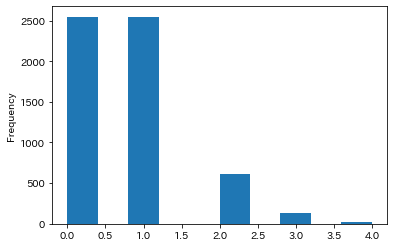

In [118]:
train2["応募数 合計"].plot.hist()

In [119]:
x = train2.drop(["応募数 合計"], axis=1)
x

,職場の様子,勤務地固定,休日休暇(月曜日),大手企業,週1日からOK,交通費別途支給,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,学校・公的機関（官公庁）,土日祝のみ勤務,Wordのスキルを活かす,給与/交通費 給与支払区分,CAD関連のスキルを活かす,派遣スタッフ活躍中,固定残業制,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,休日休暇(火曜日),平日休みあり,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,残業月10時間未満,休日休暇(土曜日),履歴書不要,休日休暇(木曜日),研修制度あり,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,休日休暇(水曜日),仕事の仕方,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,休日休暇(金曜日),産休育休取得事例あり,扶養控除内,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,残業なし,期間・時間 勤務開始月
0,3,1,0,0,0,1,0,20020,0,1,1,0,1,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,29000,1,0,0,0,0,3,0,0,1,0,1,1,2,1,0,1,0,1080,1,1,1,101,1,9
1,3,1,0,0,0,1,0,22020,0,1,1,0,1,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,1,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,22000,1,0,0,0,0,3,1,0,1,0,1,1,2,1,0,1,0,1080,1,1,1,101,1,9
2,3,1,0,0,0,1,0,20510,1,1,1,0,1,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,28000,1,0,0,0,0,5,1,0,1,0,1,1,2,1,0,1,0,1110,1,1,1,101,1,9
3,3,1,0,0,0,1,0,20020,0,1,1,0,1,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,1,0,1,1,0,0,0,1,99,0,1,0,1,0,1,1,0,1,1,0,1,0,0,26000,1,0,0,0,0,2,1,0,1,0,1,1,2,1,0,1,0,1080,1,1,1,101,1,9
4,3,1,0,1,0,1,0,20020,0,1,1,0,1,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,22000,1,0,0,0,0,5,1,0,1,0,1,1,2,1,0,1,0,1080,1,1,1,101,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,4,1,0,0,0,0,0,20020,1,1,1,0,0,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,30000,36,0,1,0,0,3,0,0,1,0,1,1,3,1,0,1,0,1000,1,1,1,201,1,11
5857,3,1,0,0,0,0,0,20020,0,1,1,0,0,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,0,0,0,1,1,0,1,0,0,28000,36,0,0,1,0,1,0,0,1,0,1,1,3,1,0,1,0,1100,1,1,1,201,1,11
5858,3,1,0,1,0,0,0,20020,1,1,1,0,0,0,0,0,1,3,0,0,0,0,2,1,0,1,1,0,0,1,0,5,1,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,1,0,1,1,0,1,0,0,28000,36,0,0,0,0,1,1,0,1,0,1,1,3,1,0,1,0,1010,1,1,1,201,1,11
5859,3,1,0,0,0,0,0,20020,0,1,1,0,0,0,0,0,1,3,0,1,0,0,2,1,0,1,1,0,0,1,0,5,0,0,0,1,0,0,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,0,1,1,0,1,0,0,22000,36,0,1,0,0,2,0,0,1,0,1,1,3,1,0,1,0,1000,1,1,1,201,1,11


<AxesSubplot:ylabel='Frequency'>

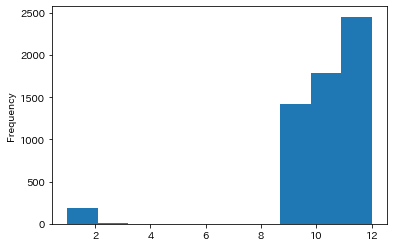

In [232]:
x["期間・時間　勤務開始月"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

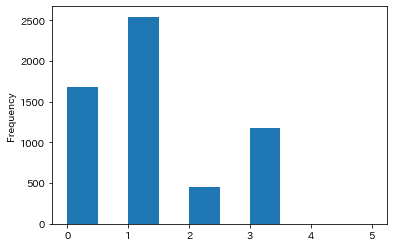

In [233]:
x["フラグオプション選択"].plot.hist()

In [120]:
y = train2["応募数 合計"]
y.value_counts()

1    2547
0    2547
2     612
3     136
4      18
Name: 応募数 合計, dtype: int64

# SMOTE

In [145]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={ 0:len(y[y==0]), 1:int( len(y[y==1])*1), 2:int( len(y[y==2])*4 ), 2:int( len(y[y==2])*4 ), 3:int( len(y[y==3])*18), 4:int( len(y[y==4])*130 ) } )
X_resampled, y_resampled = smote.fit_resample(x, y)

 ratio == sampling_strategy  これの*intが大きすぎると、警告が出てしまう

In [149]:
y_resampled.value_counts()

1    2547
0    2547
3    2448
2    2448
4    2340
Name: 応募数 合計, dtype: int64

<AxesSubplot:ylabel='Frequency'>

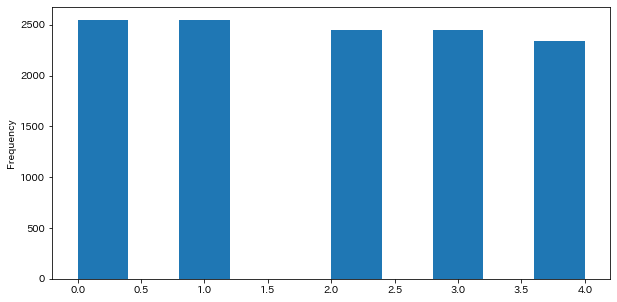

In [150]:
y_resampled.plot.hist(figsize=(10, 5))

In [151]:
x_1 = X_resampled[["大手企業", 
                   "交通費別途支給",  
                   "残業月20時間以上", 
                   "1日7時間以下勤務OK",
                   "駅から徒歩5分以内",
                   "学校・公的機関（官公庁）", 
                   "派遣スタッフ活躍中", 
                   "大量募集", 
                   "Accessのスキルを活かす",
                   "平日休みあり",
                   "フラグオプション選択",
                   "派遣形態", 
                   "正社員登用あり",
                   "社員食堂あり",
                   "服装自由",
                   "期間・時間　勤務開始月", 
                   "PowerPointのスキルを活かす", 
                   "PCスキル不要",
                   "車通勤OK",
                   "仕事の仕方",
                   "未経験OK",
                   "土日祝休み",
                   "給与/交通費　交通費",
                   "給与/交通費　給与下限",
                   "オフィスが禁煙・分煙",
                   "残業なし"
  ]]
x_1

,大手企業,交通費別途支給,残業月20時間以上,1日7時間以下勤務OK,駅から徒歩5分以内,学校・公的機関（官公庁）,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,平日休みあり,フラグオプション選択,派遣形態,正社員登用あり,社員食堂あり,服装自由,期間・時間 勤務開始月,PowerPointのスキルを活かす,PCスキル不要,車通勤OK,仕事の仕方,未経験OK,土日祝休み,給与/交通費 交通費,給与/交通費 給与下限,オフィスが禁煙・分煙,残業なし
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,9,0,0,0,3,1,1,2,1080,1,1
1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,9,0,0,0,3,1,1,2,1080,1,1
2,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,9,0,0,0,5,1,1,2,1110,1,1
3,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,9,1,0,0,2,1,1,2,1080,1,1
4,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,9,0,0,0,5,1,1,2,1080,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,9,0,0,0,2,0,1,3,1683,1,1
12326,0,1,0,0,1,0,0,0,0,0,2,0,0,0,1,10,0,0,0,2,0,1,2,1644,1,1
12327,0,0,0,0,1,0,0,0,0,0,2,1,1,0,0,10,0,0,0,1,1,1,2,1548,1,1
12328,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,10,0,0,0,4,0,1,3,1753,1,0


In [166]:
y_1 = y_resampled.copy()

<AxesSubplot:ylabel='Frequency'>

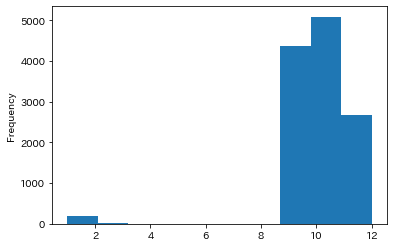

In [231]:
x_1["期間・時間　勤務開始月"].plot.hist()

 9月１０月が12月を抜かした理由として、応募数が多いところは9月１０月から勤務開始日であり、SMOTEで母数を増やしたため

<AxesSubplot:ylabel='Frequency'>

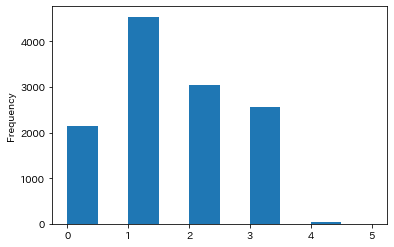

In [235]:
x_1["フラグオプション選択"].plot.hist()

SMOTEによって、正規分布に近しい値となったと考えられる。

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
train_x, test_x, train_y, test_y = train_test_split(x_1, y_1, test_size=0.4, random_state=0)

In [169]:
from sklearn.ensemble import RandomForestRegressor as RF

In [170]:
rfr = RF(random_state=0)

In [171]:
rfr.fit(train_x, train_y)

RandomForestRegressor(random_state=0)

In [172]:
pred_y = rfr.predict(test_x)

In [173]:
from sklearn.metrics import mean_squared_error

In [174]:
np.sqrt(mean_squared_error(pred_y, test_y))

0.5954033904973096

In [175]:
from sklearn.metrics import r2_score

In [176]:
r2 = r2_score(test_y, pred_y)
r2

0.8179850035043337

In [201]:
pickle_out = open("rfr_5_26_0_smote.pkl", "wb")
pickle.dump(rfr, pickle_out)
pickle_out.close()

In [202]:
assign = pd.read_csv("test_x.csv")

In [203]:
assign["期間・時間　勤務開始月"] = assign["期間・時間　勤務開始日"].apply(lambda x : x.split("/")[1])

In [204]:
assign["期間・時間　勤務開始月"] = assign["期間・時間　勤務開始月"].astype(np.int)

In [205]:
assign

,勤務地 最寄駅3（駅名）,ミドル（40〜）活躍中,オープニングスタッフ,未使用.20,英語力不要,経験者優遇,Wordのスキルを活かす,メモ,派遣スタッフ活躍中,勤務地 最寄駅1（駅からの交通手段）,派遣形態,DTP関連のスキルを活かす,勤務地 都道府県コード,休日休暇(祝日),（紹介予定）年収・給与例,WEB面接OK,応募先 備考,社員食堂あり,就業形態区分,車通勤OK,給与/交通費 給与支払区分,応募拠点,残業なし,残業月20時間未満,履歴書不要,大手企業,固定残業制 残業代 下限,未使用.12,（派遣先）職場の雰囲気,シニア（60〜）歓迎,（派遣先）概要 従業員数,未使用.14,交通費別途支給,20代活躍中,未使用.5,休日休暇(木曜日),未使用.3,（派遣）応募後の流れ,勤務地 最寄駅2（駅名）,募集形態,勤務先公開,勤務地 市区町村コード,ベンチャー企業,期間・時間 勤務期間,未使用.13,残業月20時間以上,給与/交通費 交通費,制服あり,勤務地 最寄駅1（分）,（派遣以外）応募後の流れ,経験必須,動画ファイル名,勤務地 最寄駅1（駅名）,（派遣先）概要 勤務先名（フリガナ）,フラグオプション選択,期間・時間 勤務開始日,勤務地 最寄駅3（沿線名）,土日祝のみ勤務,勤務地 最寄駅2（沿線名）,週2・3日OK,休日休暇(水曜日),掲載期間 終了日,お仕事のポイント（仕事PR）,フリー項目 内容,ブロックコード3,未使用.16,お仕事No.,バイク・自転車通勤OK,給与/交通費 給与下限,週4日勤務,未使用.9,動画タイトル,勤務地 最寄駅1（沿線名）,週払い,外国人活躍中・留学生歓迎,職種コード,人材紹介,（紹介予定）雇用形態備考,駅から徒歩5分以内,会社概要 業界コード,これまでの採用者例,土日祝休み,社会保険制度あり,仕事写真（下） 写真3 コメント,（派遣先）概要 勤務先名（漢字）,Dip JobsリスティングS,10時以降出社OK,日払い,紹介予定派遣,正社員登用あり,フリー項目 タイトル,短時間勤務OK(1日4h以内),（派遣先）配属先部署 平均年齢,拠点番号,PowerPointのスキルを活かす,未使用.11,応募先 名称,（派遣先）配属先部署 男女比 男,給与 経験者給与下限,未使用.8,（派遣先）勤務先写真コメント,無期雇用派遣,応募先 所在地 ブロックコード,Wワーク・副業可能,残業月10時間未満,待遇・福利厚生,...,未使用.18,給与/交通費 給与上限,未使用.15,（紹介予定）入社後の雇用形態,少人数の職場,固定残業制 残業代に充当する労働時間数 下限,新卒・第二新卒歓迎,未使用.4,学校・公的機関（官公庁）,勤務地 周辺情報,未使用.10,資格取得支援制度あり,仕事内容,期間･時間 備考,応募先 所在地 都道府県,学生歓迎,先輩からのメッセージ,期間・時間 勤務時間,英語以外の語学力を活かす,対象者設定 年齢上限,未使用.1,服装自由,給与 経験者給与上限,17時以降出社OK,休日休暇(金曜日),エルダー（50〜）活躍中,30代活躍中,（紹介予定）待遇・福利厚生,Accessのスキルを活かす,未使用.7,16時前退社OK,固定残業制,PCスキル不要,仕事写真（下） 写真2 コメント,Excelのスキルを活かす,電話応対なし,大量募集,検索対象エリア,ネットワーク関連のスキルを活かす,休日休暇(火曜日),プログラム関連のスキルを活かす,お仕事名,対象者設定 性別,未使用.21,仕事写真（下） 写真1 ファイル名,未使用.2,休日休暇(土曜日),仕事写真（下） 写真1 コメント,CAD関連のスキルを活かす,公開区分,ブランクOK,（派遣先）概要 事業内容,未使用.17,オフィスが禁煙・分煙,未使用.22,（派遣先）配属先部署,外資系企業,1日7時間以下勤務OK,WEB登録OK,勤務地固定,勤務地 最寄駅2（分）,仕事の仕方,（紹介予定）休日休暇,ブロックコード2,（紹介予定）入社時期,扶養控除内,（派遣先）配属先部署 人数,英語力を活かす,応募先 所在地 市区町村,動画コメント,休日休暇(月曜日),ルーティンワークがメイン,未使用,寮・社宅あり,週1日からOK,応募先 最寄駅（沿線名）,休日休暇(日曜日),研修制度あり,平日休みあり,職場の様子,勤務地 最寄駅2（駅からの交通手段）,仕事写真（下） 写真2 ファイル名,休日休暇 備考,給与/交通費 備考,応募先 最寄駅（駅名）,シフト勤務,勤務地 最寄駅3（分）,固定残業制 残業代に充当する労働時間数 上限,（派遣先）配属先部署 男女比 女,雇用形態,（派遣先）勤務先写真ファイル名,固定残業制 残業代 上限,勤務地 備考,未使用.6,派遣会社のうれしい特典,産休育休取得事例あり,仕事写真（下） 写真3 ファイル名,掲載期間 開始日,勤務地 最寄駅3（駅からの交通手段）,未経験OK,ブロックコード1,未使用.19,応募資格,WEB関連のスキルを活かす,対象者設定 年齢下限,期間・時間 勤務開始月
0,NaN,1,NaN,NaN,1,1,1,NaN,1,1.0,0,0,13,1,NaN,NaN,NaN,0,1,0,3,NaN,1,0,1,0,NaN,NaN,派遣スタッフ活躍中です！<BR>,NaN,NaN,NaN,0,1,NaN,0,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,二子玉川,NaN,0,112,NaN,5,NaN,0,3,0,12.0,NaN,NaN,022_190725.mp4,成城学園前,NaN,3,2019/10/23,NaN,0,東急田園都市線,0,0,2020/10/24,◆同業務就業の方が在籍で安心！オシャレを楽しめるオフィカジＯＫ♪給湯設備・ホッと一息つける休...,NaN,NaN,NaN,2203556553,NaN,1600,0,NaN,こだわりの条件でワガママに探せる＊,小田急小田原線,NaN,NaN,22010,NaN,NaN,0,30000,NaN,1,1,NaN,NaN,0,0,NaN,0,0,NaN,0,46.0,206東京,1,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,1650.0,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,1,派遣スタッフ＆幅広い年齢層の方々が活躍中！基本土日祝お休み！プライベートも充実！自転車通勤可...,NaN,NaN,NaN,NaN,8:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,0,99,NaN,1,NaN,NaN,0,NaN,1,NaN,0,NaN,0,0,0,NaN,1,NaN,0,1,NaN,0,NaN,ほぼ１６時半まで！学校法人／窓口の受付など！未経験ＯＫ,1,NaN,NaN,NaN,1,NaN,0,2,NaN,NaN,NaN,1,NaN,会計ソフト入力などを行う部署,0,1,1,1,15.0,2,NaN,NaN,NaN,0,9.0,0,NaN,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,0,1,NaN,NaN,0,NaN,1,1,0,3,2.0,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,【月収例】23万5200円＋残業代（21日勤務の場合）,NaN,0,NaN,NaN,4.0,0,NaN,NaN,東京都世田谷区,NaN,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,NaN,2019/10/24,NaN,1,NaN,NaN,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（関数）・ＰｏｗｅｒＰｏｉｎｔ（文章...,NaN,0,10
1,NaN,1,NaN,NaN,1,1,1,NaN,1,1.0,1,0,13,1,★正社員登用後：年収３９０〜４１０万円（賞与含４回／年６．３ヶ月分）★,NaN,NaN,0,1,0,3,NaN,0,1,1,0,NaN,NaN,落ち着いた雰囲気の職場環境です！<BR>,NaN,NaN,NaN,0,1,NaN,0,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,水天宮前,NaN,0,102,NaN,5,NaN,0,3,0,4.0,NaN,NaN,022_190725.mp4,人形町,NaN,3,2019/10/23,NaN,0,東京メトロ半蔵門線,0,0,2020/10/24,◆２つの駅からアクセス◎！飲食店・コンビニが近くお昼もラクチン！禁煙でクリーンな環境！オフィ...,NaN,NaN,NaN,2203515280,NaN,1700,0,NaN,こだわりの条件でワガママに探せる＊,東京メトロ日比谷線,NaN,NaN,22030,NaN,正社員,1,28000,NaN,1,1,NaN,NaN,0,0,NaN,1,1,NaN,0,35.0,206東京,0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,1750.0,NaN,1.0,NaN,NaN,1,NaN,0,NaN,NaN,1,保険組合でのオシゴト！女性も多く活躍中の職場！駅からスグのきれいな自社ビルです♪♪<BR>【...,◆開始日はご相談可能です！詳しくはお問い合わせください！

In [206]:
assign_x  = assign[["大手企業", 
                   "交通費別途支給",  
                   "残業月20時間以上", 
                   "1日7時間以下勤務OK",
                   "駅から徒歩5分以内",
                   "学校・公的機関（官公庁）", 
                   "派遣スタッフ活躍中", 
                   "大量募集", 
                   "Accessのスキルを活かす",
                   "平日休みあり",
                   "フラグオプション選択",
                   "派遣形態", 
                   "正社員登用あり",
                   "社員食堂あり",
                   "服装自由",
                   "期間・時間　勤務開始月", 
                   "PowerPointのスキルを活かす", 
                   "PCスキル不要",
                   "車通勤OK",
                   "仕事の仕方",
                   "未経験OK",
                   "土日祝休み",
                   "給与/交通費　交通費",
                   "給与/交通費　給与下限",
                   "オフィスが禁煙・分煙",
                   "残業なし"
                   ]]

In [207]:
assign_x

,大手企業,交通費別途支給,残業月20時間以上,1日7時間以下勤務OK,駅から徒歩5分以内,学校・公的機関（官公庁）,派遣スタッフ活躍中,大量募集,Accessのスキルを活かす,平日休みあり,フラグオプション選択,派遣形態,正社員登用あり,社員食堂あり,服装自由,期間・時間 勤務開始月,PowerPointのスキルを活かす,PCスキル不要,車通勤OK,仕事の仕方,未経験OK,土日祝休み,給与/交通費 交通費,給与/交通費 給与下限,オフィスが禁煙・分煙,残業なし
0,0,0,0,1,0,1,1,0,0,0,3,0,0,0,1,10,1,0,0,2,1,1,3,1600,1,1
1,0,0,0,1,1,0,1,0,0,0,3,1,1,0,1,10,0,0,0,5,1,1,3,1700,1,0
2,1,0,0,1,1,0,1,0,0,0,3,1,1,1,1,10,0,0,0,1,0,1,3,1800,1,1
3,0,0,1,0,0,1,0,0,0,0,3,1,1,0,1,10,0,0,0,1,1,1,3,1650,1,0
4,0,0,0,1,1,0,0,0,0,0,3,1,1,0,1,11,1,0,0,3,1,1,3,1700,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,10,0,0,0,5,1,1,3,1550,1,1
3387,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,10,0,0,0,1,0,1,3,1800,1,0
3388,0,0,0,1,1,0,0,0,0,0,3,0,0,0,1,10,0,0,0,2,1,1,3,1700,1,1
3389,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,10,0,0,0,3,1,1,3,1600,1,0


In [208]:
answer = rfr.predict(assign_x)

In [209]:
answer_data = pd.DataFrame(data=assign["お仕事No."], columns=["お仕事No."])

In [210]:
answer_data["応募数 合計"] = answer

In [211]:
answer_data

,お仕事No.,応募数 合計
0,2203556553,2.310000
1,2203515280,2.450000
2,2203546900,3.650000
3,2203545344,3.207333
4,2203557987,1.080000
...,...,...
3386,2203538197,0.330000
3387,2203544067,0.430000
3388,2203557301,1.340000
3389,2203506336,0.886667


In [212]:
answer_data.describe()

,お仕事No.,応募数 合計
count,3.391000e+03,3391.000000
mean,2.203539e+09,0.973489
std,2.211074e+04,0.621497
min,2.203409e+09,0.000000
25%,2.203528e+09,0.514167
50%,2.203547e+09,0.850000
75%,2.203556e+09,1.308250
max,2.203560e+09,3.680000


In [213]:
answer_data.to_csv("submit_answer_data4.csv", index=None)

#  今までの試行錯誤

In [78]:
x = train.drop(["応募数 合計"], axis=1)
y = train["応募数 合計"]

In [79]:
from sklearn.feature_selection import VarianceThreshold

In [80]:
# 分散が0（すべて同じ値）のデータは削除します
sel = VarianceThreshold(threshold=0)
sel.fit(x)

# get_supportで保持するデータのみをTrue値、そうでないものはFalse値を返します
print(sum(sel.get_support()))

59


In [ ]:
rest_features = x.columns[sel.get_support()]#特徴量選択後の配列

- train.iloc[ 開始行:終了行, 開始列:終了列 ]と書くことで、列・行を数字で指定して書くことができる
- train.loc[ 開始行:終了行, 開始列:終了列 ]と書くことで、列・行を文字で指定して書くことができる

In [ ]:
x= x.loc[:, sel.get_support()]
x

In [ ]:
# indexとcolumnsを入れ替える
x_T = x.T

print(x_T.duplicated().sum())

# 同じ特徴量の名前を取得したい場合はこちら
duplicated_features = x_T[x_T.duplicated(keep=False)].index.values

print(duplicated_features)
print(len(x.columns))

In [ ]:
x = x.drop(duplicated_features, axis=1)
x

In [ ]:
# 相関係数が0.8以上の片方を削除　　
threshold = 0.8

feat_corr = set()
corr_matrix = x.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feat_name = corr_matrix.columns[i]
            feat_corr.add(feat_name)

print(len(set(feat_corr)))

x.drop(labels=feat_corr, axis='columns', inplace=True)

print(len(x.columns))


https://qiita.com/shimopino/items/5fee7504c7acf044a521

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = train[["大手企業", "交通費別途支給",  "残業月20時間以上", "1日7時間以下勤務OK", "駅から徒歩5分以内", "学校・公的機関（官公庁）", "派遣スタッフ活躍中", "大量募集", "Accessのスキルを活かす","平日休みあり", "フラグオプション選択", "派遣形態", "正社員登用あり", "社員食堂あり",  "服装自由", "期間・時間　勤務開始月", "PowerPointのスキルを活かす", "PCスキル不要", "車通勤OK", "仕事の仕方", "未経験OK", "土日祝休み", "給与/交通費　交通費", "給与/交通費　給与下限", "オフィスが禁煙・分煙", "残業なし"]]

In [ ]:
sfs1 = SFS(RandomForestRegressor(n_jobs=-1), #https://aotamasaki.hatenablog.com/entry/2018/06/14/235157
           k_features=20,   # 特徴量をいくつ出力させるか
           forward=True,
           verbose=2,  #実行時のlogをどれだけ詳しく説明するか
           scoring="neg_root_mean_squared_error",
           cv=3)

# 埋め込み法
## ランダムフォレストを使用する場合

In [ ]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=200))#決定木の本数200本

sel.fit(x, y) #X,Yはそれぞれ説明変数，目的変数の配列

rest_features = x.columns[sel.get_support()]#特徴量選択後の配列

In [ ]:
rest_features

# グリッドサーチ+クロスバリデーションで最適なパラメータを探す

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters = {"max_depth": list(range(2, 11)), "min_samples_leaf": [5, 10, 20, 50, 100, 500]}
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [5, 10, 20, 50, 100, 500]}

In [63]:
gcv = GridSearchCV(rfr, parameters, cv = 5, scoring = "neg_root_mean_squared_error", n_jobs = -1, return_train_score = True)
gcv.fit(x_1, y_1) #negはマイナスという意味、rmseは小さいほどよいので、- がつけられる　　https://qiita.com/Mukomiz/items/fcdf1f6c2bc1e89bbc8b

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [64]:
gcv.best_params_

{'max_depth': 10, 'min_samples_leaf': 5}

In [65]:
gcv.cv_results_

{'mean_fit_time': array([1.30737977, 1.35585794, 1.45039086, 1.50462122, 1.51627378,
        1.46393008, 2.08835588, 2.1153266 , 2.25431027, 2.20609922,
        2.03151026, 2.31051846, 3.06682606, 2.97880964, 3.33324986,
        3.12618423, 2.9985044 , 2.41640644, 3.15771813, 3.46085896,
        3.21323028, 3.10424514, 3.54285669, 3.01494122, 3.9873343 ,
        4.20403471, 4.00268321, 3.36327252, 3.17389545, 2.34884415,
        3.87929411, 4.05355597, 4.4266623 , 4.1689312 , 4.05370145,
        2.5791532 , 4.88271055, 5.2931942 , 5.20383744, 4.3714932 ,
        4.13778801, 3.11282797, 6.02915606, 5.69298935, 5.44649997,
        4.40709372, 3.58835063, 2.36436634, 5.88475866, 6.30661335,
        6.24676762, 4.73380103, 3.84352069, 2.1569088 ]),
 'std_fit_time': array([0.03519087, 0.08874851, 0.00531746, 0.03942481, 0.00859413,
        0.01265085, 0.1090639 , 0.02545089, 0.02978401, 0.13143147,
        0.07273119, 0.1363891 , 0.04126883, 0.08954199, 0.16474782,
        0.12096813, 0.069

# ビニング

In [ ]:
x = train.drop(["応募数 合計"], axis=1)
y = train["応募数 合計"]

In [ ]:
x_bins = 　x["給与/交通費　給与下限"]
x_bins

bins  = np.linspace(800, 2900, 6)

x_bins = np.digitize(x_bins, bins = bins)
x_bins

x_bining = pd.DataFrame(data = x_bins)
x_bining

In [ ]:
x["給与/交通費　給与下限"] = x_bining
x

# describe関数を使って実際に比較

In [ ]:
Describe = x.drop(columns=x.select_dtypes(include="object").columns)

In [ ]:
Describe2 = train[train["応募数 合計"] > 2].sort_values(by = "応募数 合計", ascending = False) # 大きい順に並ぶ
Describe2

In [ ]:
Describe3 = train[train["応募数 合計"] > 0]
Describe3

In [ ]:
describe = pd.DataFrame(Describe.describe())

describe2 = pd.DataFrame(Describe2.describe())

describe3 = pd.DataFrame(Describe3.describe())

# gbrモデル

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GB

In [ ]:
gbr = GB(random_state=0)

In [ ]:
gbr 

In [ ]:
gbr.fit(train_x, train_y)

In [ ]:
pred_y = gbr.predict(test_x)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(pred_y, test_y))　# https://aizine.ai/glossary-mse/    # https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/

# オーバーサンプリング

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# オブジェクト生成
ros = RandomOverSampler(random_state=0)
ros

In [ ]:
X_resampled, y_resampled = ros.fit_resample(x, y)

# 特徴量選択のまとめ

https://qiita.com/shimopino/items/5fee7504c7acf044a521

# trainデータを使って確かめ

In [214]:
assign_test = pd.read_csv("train_x.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (114) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [215]:
assign_test["期間・時間　勤務開始月"] = assign_test["期間・時間　勤務開始日"].apply(lambda x : x.split("/")[1])                     
assign_test["期間・時間　勤務開始月"] = assign_test["期間・時間　勤務開始月"].astype(np.int)
assign_testx  = assign_test[["大手企業", 
                   "交通費別途支給",  
                   "残業月20時間以上", 
                   "1日7時間以下勤務OK",
                   "駅から徒歩5分以内",
                   "学校・公的機関（官公庁）", 
                   "派遣スタッフ活躍中", 
                   "大量募集", 
                   "Accessのスキルを活かす",
                   "平日休みあり",
                   "フラグオプション選択",
                   "派遣形態", 
                   "正社員登用あり",
                   "社員食堂あり",
                   "服装自由",
                   "期間・時間　勤務開始月", 
                   "PowerPointのスキルを活かす", 
                   "PCスキル不要",
                   "車通勤OK",
                   "仕事の仕方",
                   "未経験OK",
                   "土日祝休み",
                   "給与/交通費　交通費",
                   "給与/交通費　給与下限",
                   "オフィスが禁煙・分煙",
                   "残業なし"
                    ]]
answer_test = rfr.predict(assign_testx)
answer_testdata = pd.DataFrame(data=assign_test["お仕事No."], columns=["お仕事No."])
answer_testdata["応募数 合計"] = answer_test

In [216]:
answer_truth = pd.read_csv("train_y.csv")
compare = pd.read_csv("train_y.csv")

compare = compare.drop(["応募数 合計"], axis = 1)

compare["応募数 合計 truth"] = answer_truth["応募数 合計"]
compare["応募数 合計 predict"] = answer_testdata["応募数 合計"]

In [217]:
compare.describe()

,お仕事No.,応募数 合計 truth,応募数 合計 predict
count,1.585300e+04,15853.000000,15853.000000
mean,3.129635e+09,0.542247,0.829333
std,1.486560e+09,0.785475,0.601177
min,1.103518e+09,0.000000,0.000000
25%,2.203538e+09,0.000000,0.350000
50%,2.203569e+09,0.000000,0.730000
75%,3.703541e+09,1.098612,1.160000
max,8.403569e+09,4.615121,4.000000


In [221]:
compare.sort_values(by = "応募数 合計 predict", ascending=False).head(500)

,お仕事No.,応募数 合計 truth,応募数 合計 predict
8026,2203511565,2.397895,4.000000
8025,2203511565,2.397895,4.000000
10589,2203536034,0.000000,3.860000
10590,2203536034,1.386294,3.860000
7871,2203546900,3.295837,3.650000
7870,2203546900,3.951244,3.650000
12819,3703515978,3.970292,3.510000
12820,3703515978,3.970292,3.510000
7958,2203527444,3.871201,3.490000
7884,2203501746,3.218876,3.450000


In [239]:
compare.head(100)

,お仕事No.,応募数 合計 truth,応募数 合計 predict
0,2203566799,1.945910,0.540000
1,2203546900,3.951244,1.076667
2,2203546900,3.295837,1.076667
3,2203545344,3.970292,2.150000
4,2203545344,3.784190,2.150000
5,2203569493,1.945910,1.660000
6,2203556553,2.564949,2.727500
7,2203563008,1.945910,1.395000
8,2203526826,3.218876,1.729000
9,2203526826,2.708050,1.729000


In [219]:
np.sqrt(mean_squared_error(compare["応募数 合計 predict"], compare["応募数 合計 truth"]))
# https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/

0.7936541153952825